In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
from scipy.optimize import curve_fit


In [3]:
def calb(bin):
  return -40.609966 + bin * 0.090725

filename = "Na22.Spe"
file = open(filename, "r")
lines = file.readlines()
file.close()
counts = lines[12:16396] # only includes the counts in each bin in lines
counts = [int(i.strip()) for i in counts]

def index(i): # give the line number in file, output index in lines
  return i - 13

/var/folders/my/7_s7rmpd2nbftt_ccq3xskj00000gn/T/ipykernel_53765/3304505164.py:25: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(tanh, np.array(bins)[mask], np.array(counts)[mask])


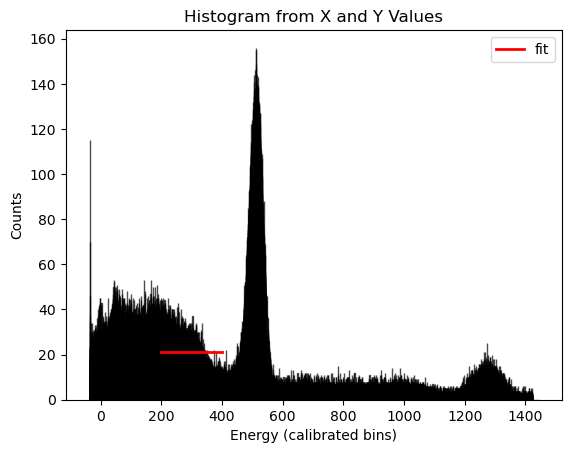

[-89.5332627    1.           1.         110.47155671]


In [4]:
bins = []
for i in range(len(counts)):
  bins.append( -40.609966 + i * 0.090725)

plt.bar(bins, counts, width= 0.090725, align='edge', alpha=0.7, edgecolor='black')
plt.xlabel('Energy (calibrated bins)')
plt.ylabel('Counts')
plt.title('Histogram from X and Y Values')

# fit the plot using a function called f that i will define later on range 200-400
def tanh(x, a,b,c,d):
  return a * np.tanh(b * x + c) + d

mask = (np.array(bins)>200) & (np.array(bins)<400)
popt, pcov = curve_fit(tanh, np.array(bins)[mask], np.array(counts)[mask])

x_fit=np.linspace(200, 400, 100)
y_fit=tanh(x_fit, *popt)

plt.plot(x_fit, y_fit, color='red', label="fit", linewidth=2)
plt.legend()
plt.show()

print(popt)


In [13]:
def tanh(x, a,b,c,d):
  return a * np.tanh(b * x + c) + d

def line(x,a,b):
  return a*x+b

# find the first bin that is greater than 200
for i in range(len(bins)):
  if bins[i] > 250:
    bottombin=i
    break
# find the first bin that is greater than 400
for i in range(len(bins)):
  if bins[i] > 400:
    topbin=i
    break

x = bins[bottombin:topbin]
y = counts[bottombin:topbin]

popt, pcov = curve_fit(tanh, x, y)
print(popt)

[109.0990764    1.           1.         -90.91758819]


/var/folders/my/7_s7rmpd2nbftt_ccq3xskj00000gn/T/ipykernel_53765/2211999510.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(tanh, x, y)


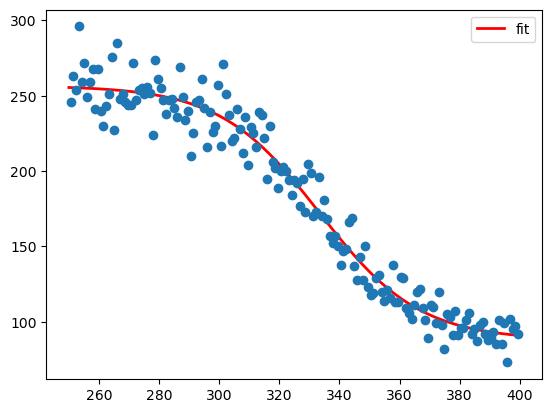

[ 8.43370963e+01 -3.01454548e-02 -3.33393496e+02  1.72253989e+02]


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the calibration function
def calb(bin):
    return -40.609966 + bin * 0.090725

# Open and read the file
filename = "Na22.Spe"
file = open(filename, "r")
lines = file.readlines()
file.close()

# Extract the counts from the file (only includes the counts in each bin in lines)
counts = lines[12:16396]
counts = [int(i.strip()) for i in counts]

# Increase bin size by a factor of n (adjust this value to change bin size)
n = 10  # new bin size factor
rebinned_counts = [sum(counts[i:i+n]) for i in range(0, len(counts), n)]
rebinned_bins = [calb(i) for i in range(0, len(counts), n)]

# # Plot the rebinned histogram
# plt.bar(rebinned_bins, rebinned_counts, width=n*0.090725, align='edge', alpha=0.7, edgecolor='black')
# plt.xlabel('Energy (calibrated bins)')
# plt.ylabel('Counts')
# plt.title('Rebinned Histogram')

for i in range(len(rebinned_bins)):
  if rebinned_bins[i] > 250:
    bottombin=i
    break
# find the first bin that is greater than 400
for i in range(len(rebinned_bins)):
  if rebinned_bins[i] > 400:
    topbin=i
    break
  
xdata = rebinned_bins[bottombin:topbin]
ydata = rebinned_counts[bottombin:topbin]



# # Define the tanh function for fitting
def tanh(x, a, b, c, d):
    return a * np.tanh(b * (x + c)) + d

# guess = 400, -0.03, -325, 900
guess = [78.5, -0.02666666666666667, -325.0, 167.5]
popt, pcov = curve_fit(tanh, xdata, ydata, p0=guess)

# Plot the fit
x_fit = np.linspace(250, 400, 100)
y_fit = tanh(x_fit, *popt)
# y_fit = tanh(x_fit, 400, -0.03, -325, 900)
plt.plot(x_fit, y_fit, color='red', label="fit", linewidth=2)
plt.legend()
plt.plot(xdata, ydata, 'o')
plt.show()

print(popt)



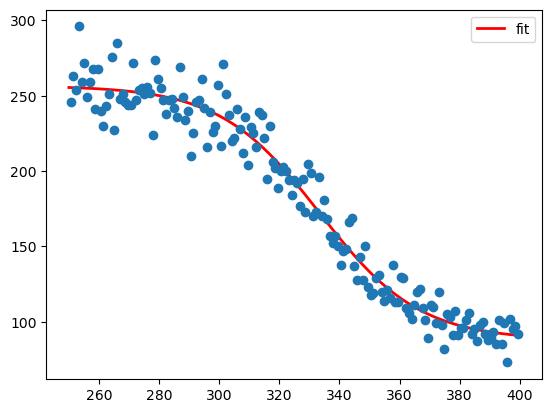

[ 8.43370460e+01 -3.01455072e-02 -3.33393498e+02  1.72253990e+02]


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the calibration function
def calb(bin):
    return -40.609966 + bin * 0.090725

# Open and read the file
filename = "Na22.Spe"
file = open(filename, "r")
lines = file.readlines()
file.close()

# Extract the counts from the file (only includes the counts in each bin in lines)
counts = lines[12:16396]
counts = [int(i.strip()) for i in counts]

# Increase bin size by a factor of n (adjust this value to change bin size)
n = 10  # new bin size factor
rebinned_counts = [sum(counts[i:i+n]) for i in range(0, len(counts), n)]
rebinned_bins = [calb(i) for i in range(0, len(counts), n)]

# # Plot the rebinned histogram
# plt.bar(rebinned_bins, rebinned_counts, width=n*0.090725, align='edge', alpha=0.7, edgecolor='black')
# plt.xlabel('Energy (calibrated bins)')
# plt.ylabel('Counts')
# plt.title('Rebinned Histogram')

for i in range(len(rebinned_bins)):
  if rebinned_bins[i] > 250:
    bottombin=i
    break
# find the first bin that is greater than 400
for i in range(len(rebinned_bins)):
  if rebinned_bins[i] > 400:
    topbin=i
    break
  
xdata = rebinned_bins[bottombin:topbin]
ydata = rebinned_counts[bottombin:topbin]



# # Define the tanh function for fitting
def tanh(x, a, b, c, d):
    return a * np.tanh(b * (x + c)) + d

guess = 400, -0.03, -325, 900

popt, pcov = curve_fit(tanh, xdata, ydata, p0=guess)

# Plot the fit
x_fit = np.linspace(250, 400, 100)
y_fit = tanh(x_fit, *popt)
# y_fit = tanh(x_fit, 400, -0.03, -325, 900)
plt.plot(x_fit, y_fit, color='red', label="fit", linewidth=2)
plt.legend()
plt.plot(xdata, ydata, 'o')
plt.show()

print(popt)

